### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

The data set used in this project is Hysets (https://osf.io/rpc3w/). The Hydrometeorological Sandbox - École de technologie supérieure (HYSETS) is a rich, general and large-scale database for hydrological modelling covering 14425 watersheds in North America. The database includes data covering the period 1950-2018 depending on the type and source of data:
- Watershed properties including boundaries, area, elevation slope, land use, soil properties and other physiographic information;
- Hydrometric gauging station discharge time-series;
- Maximum and minimum daily air temperatures and precipitation from weather gauges, NRCan and Livneh gridded interpolated products, SCDNA infilled-station data and ERA5 / ERA5-Land reanalyses;
- SNODAS and ERA5-Land snow water equivalent;
- Other diagnostic variables;
- Monthly agregation of meteorological variables;
- Elevation band data for each catchment in 100m increments.

For this study, we will be focusing on two areas. One in Pacific Northwest (near Washington, Oregon, US, and BC, Canada); the other in southeast Atlantic Coast (near Georgia, Alabama).
The map is outlined below:
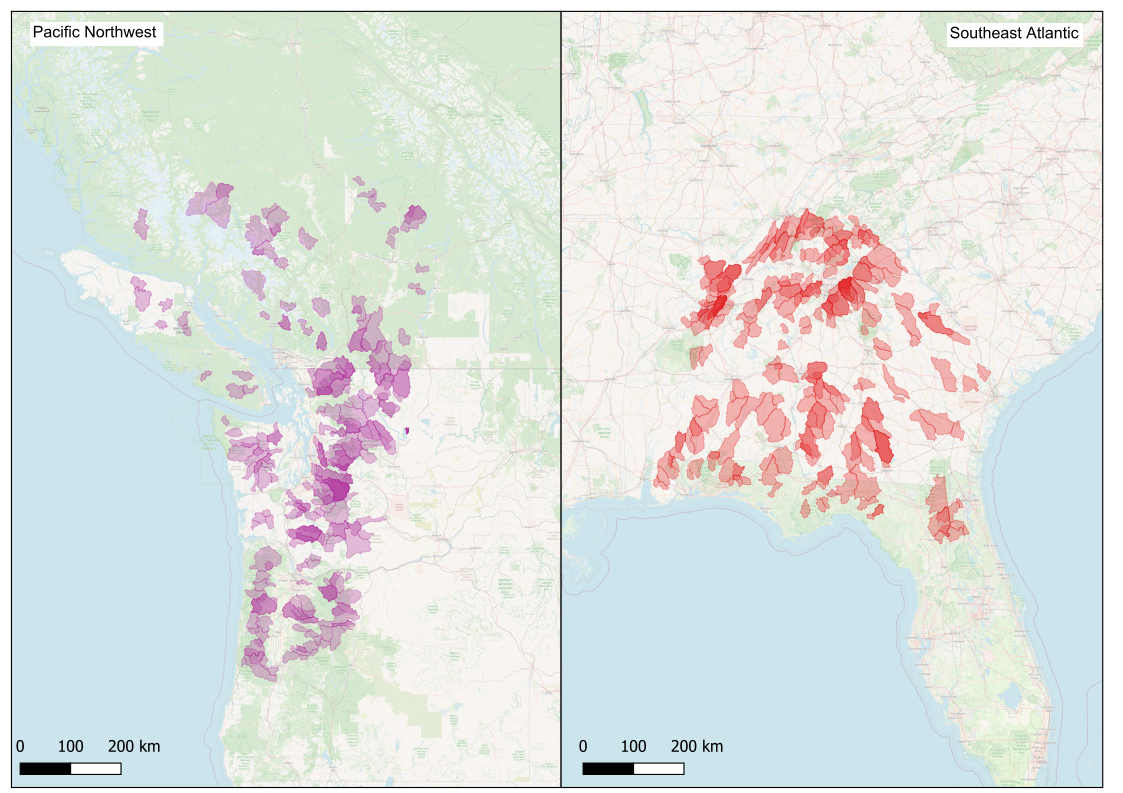

From QGIS, we have selected the catchments that are located in our area of interest, and had two csv named atlantic.csv and pacific.csv that contains the catchment names.

In [2]:
atlantic_df = pd.read_csv('atlantic.csv')
pacific_df = pd.read_csv('pacific.csv')
print('No. of catchments for atlantic:', atlantic_df.shape[0])
print('No. of catchments for atlantic:', pacific_df.shape[0])

No. of catchments for atlantic: 235
No. of catchments for atlantic: 243


### Catchment/Watersheds static information

Catchment static information is also another important attirbute for the model. The catchment area, land use, soil type will also affect the streamflow. We will now look into the static catchment/watershed properties.

In [3]:
static_df = pd.read_csv('HYSETS_watershed_properties.txt', sep=',')
print('static_df shape:',static_df.shape)
pd.set_option('display.max_columns', None)
static_df.head(10)

static_df shape: (14425, 31)


,Watershed_ID,Source,Name,Official_ID,Centroid_Lat_deg_N,Centroid_Lon_deg_E,Drainage_Area_km2,Drainage_Area_GSIM_km2,Flag_GSIM_boundaries,Flag_Artificial_Boundaries,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
0,1,HYDAT,SAINT JOHN RIVER AT FORT KENT,01AD002,47.25806,-68.59583,14703.9211,NaN,0,0,362.3,3.5329,2.7834,1194.505,0,130.4023,0,0.7869,0.0147,0.0645,0.0258,0.0089,0.0749,0.0242,0.0,0,-14.719327,0.180905,0,47.25806,-68.59583
1,2,HYDAT,ST. FRANCIS RIVER AT OUTLET OF GLASIER LAKE,01AD003,47.20661,-68.95694,1358.6435,NaN,0,0,353.4,4.6633,2.0656,269.164,0,91.7329,0,0.8452,0.0102,0.0228,0.0219,0.0174,0.0410,0.0414,0.0,0,-14.056491,0.206450,0,47.20661,-68.95694
2,3,HYDAT,MADAWASKA (RIVIERE) A 6 KM EN AVAL DU BARRAGE ...,01AD015,47.53850,-68.59180,2712.0000,2693.814,1,0,293.3,4.4690,2.0620,381.994,0,223.9510,0,0.8207,0.0093,0.0032,0.0487,0.0230,0.0351,0.0600,0.0,0,-14.537390,0.165357,0,47.53850,-68.59180
3,4,HYDAT,FISH RIVER NEAR FORT KENT,01AE001,47.23750,-68.58278,2245.7638,NaN,0,0,276.5,4.1819,2.4682,413.839,0,120.7400,0,0.6837,0.0226,0.1024,0.0630,0.0115,0.0641,0.0528,0.0,0,-14.687869,0.170597,0,47.23750,-68.58278
4,5,HYDAT,BLACK BROOK NEAR ST-ANDRE-DE-MADAWASKA,01AF006,47.09139,-67.73139,14.2000,NaN,0,1,201.8,2.8061,NaN,NaN,1,56.8902,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0,0,NaN,NaN,1,47.09139,-67.73139
5,6,HYDAT,GRANDE RIVIERE AT VIOLETTE BRIDGE,01AF007,47.24697,-67.92128,328.4387,NaN,0,0,266.7,3.1618,2.4173,154.916,0,208.9651,0,0.7936,0.0694,0.0737,0.0020,0.0122,0.0353,0.0138,0.0,0,-13.525159,0.125962,0,47.24697,-67.92128
6,7,HYDAT,IROQUOIS RIVER AT MOULIN MORNEAULT,01AF009,47.45783,-68.35683,184.1086,NaN,0,0,336.5,5.9008,1.6503,79.153,0,184.6077,0,0.9107,0.0118,0.0013,0.0021,0.0179,0.0448,0.0116,0.0,0,-15.200000,0.190000,0,47.45783,-68.35683
7,8,HYDAT,MAMOZEKEL RIVER NEAR CAMPBELL RIVER,01AH005,47.25083,-67.14222,230.0000,223.604,1,0,339.3,5.9632,1.6687,88.559,0,224.0896,0,0.8220,0.1152,0.0023,0.0001,0.0079,0.0526,0.0000,0.0,0,-12.285804,0.080820,0,47.25083,-67.14222
8,9,HYDAT,MEDUXNEKEAG RIVER NEAR BELLEVILLE,01AJ003,46.21622,-67.72794,1206.8273,NaN,0,0,182.5,2.1286,2.0087,247.274,0,99.7790,0,0.5851,0.0119,0.1570,0.0087,0.0382,0.0496,0.1495,0.0,0,-14.263455,0.103643,0,46.21622,-67.72794
9,10,HYDAT,BIG PRESQUE ISLE STREAM AT TRACEY MILLS,01AJ004,46.43836,-67.73844,487.5935,NaN,0,0,185.3,2.4437,2.0068,156.926,0,113.3444,0,0.4145,0.0089,0.1656,0.0039,0.0493,0.0217,0.3362,0.0,0,-12.404448,0.082425,0,46.43836,-67.73844


In [4]:
static_df.columns


Index(['Watershed_ID', 'Source', 'Name', 'Official_ID', 'Centroid_Lat_deg_N',
       'Centroid_Lon_deg_E', 'Drainage_Area_km2', 'Drainage_Area_GSIM_km2',
       'Flag_GSIM_boundaries', 'Flag_Artificial_Boundaries', 'Elevation_m',
       'Slope_deg', 'Gravelius', 'Perimeter', 'Flag_Shape_Extraction',
       'Aspect_deg', 'Flag_Terrain_Extraction', 'Land_Use_Forest_frac',
       'Land_Use_Grass_frac', 'Land_Use_Wetland_frac', 'Land_Use_Water_frac',
       'Land_Use_Urban_frac', 'Land_Use_Shrubs_frac', 'Land_Use_Crops_frac',
       'Land_Use_Snow_Ice_frac', 'Flag_Land_Use_Extraction',
       'Permeability_logk_m2', 'Porosity_frac', 'Flag_Subsoil_Extraction',
       'Hydrometric_station_latitude', 'Hydrometric_station_longitude'],
      dtype='object')

Here, we would like to remove the followings that may not be related to the streamflow.

'Watershed_ID', 'Source', 'Name', 'Centroid_Lat_deg_N', 'Centroid_Lon_deg_E', 'Drainage_Area_GSIM_km2', 'Flag_GSIM_boundaries','Flag_Artificial_Boundaries', 'Hydrometric_station_latitude', 'Hydrometric_station_longitude'.

In [4]:
# List of columns to be removed
columns_to_remove = [
    'Watershed_ID', 'Source', 'Name', 'Centroid_Lat_deg_N', 'Centroid_Lon_deg_E',
    'Drainage_Area_GSIM_km2', 'Flag_GSIM_boundaries', 'Flag_Artificial_Boundaries',
    'Hydrometric_station_latitude', 'Hydrometric_station_longitude'
]

# Drop the columns and assign the result back to df
static_df = static_df.drop(columns=columns_to_remove)

# Display the DataFrame to confirm the columns have been removed
static_df.head()

,Official_ID,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction
0,01AD002,14703.9211,362.3,3.5329,2.7834,1194.505,0,130.4023,0,0.7869,0.0147,0.0645,0.0258,0.0089,0.0749,0.0242,0.0,0,-14.719327,0.180905,0
1,01AD003,1358.6435,353.4,4.6633,2.0656,269.164,0,91.7329,0,0.8452,0.0102,0.0228,0.0219,0.0174,0.0410,0.0414,0.0,0,-14.056491,0.206450,0
2,01AD015,2712.0000,293.3,4.4690,2.0620,381.994,0,223.9510,0,0.8207,0.0093,0.0032,0.0487,0.0230,0.0351,0.0600,0.0,0,-14.537390,0.165357,0
3,01AE001,2245.7638,276.5,4.1819,2.4682,413.839,0,120.7400,0,0.6837,0.0226,0.1024,0.0630,0.0115,0.0641,0.0528,0.0,0,-14.687869,0.170597,0
4,01AF006,14.2000,201.8,2.8061,NaN,NaN,1,56.8902,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0,0,NaN,NaN,1


In [5]:
atlantic_df['Official_ID'] = atlantic_df['gauge_id'].str.replace('hysets_', '')
atlantic_id_list = atlantic_df['Official_ID'].tolist()
atlantic_static_df = static_df[static_df['Official_ID'].isin(atlantic_id_list)]
print("Entries for atlantic:", atlantic_static_df.shape)
atlantic_static_df.head()

Entries for atlantic: (235, 21)


,Official_ID,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction
4206,02188680,208.2340,235.5,1.4932,1.7110,91.125,0,136.5367,0,0.3690,0.0758,0.0286,0.0058,0.1062,0.0109,0.4037,0.0,0,-14.100000,0.010000,0
4210,02191300,1968.3812,250.5,2.5054,1.3908,227.346,0,143.0697,0,0.5019,0.0918,0.0279,0.0052,0.1003,0.0151,0.2579,0.0,0,-14.099049,0.010182,0
4211,02191743,580.1545,216.4,1.5569,1.3261,118.431,0,91.6966,0,0.4504,0.0711,0.0347,0.0061,0.1157,0.0188,0.3033,0.0,0,-14.100000,0.010000,0
4217,02193500,756.2728,174.5,1.6931,1.3629,138.947,0,131.7664,0,0.6208,0.1154,0.0449,0.0035,0.0433,0.0708,0.1012,0.0,0,-14.098759,0.010237,0
4220,02195320,274.5374,128.6,1.8180,1.2852,78.840,0,82.4533,0,0.6547,0.0973,0.0242,0.0085,0.0540,0.0592,0.1021,0.0,0,-13.907788,0.036075,0


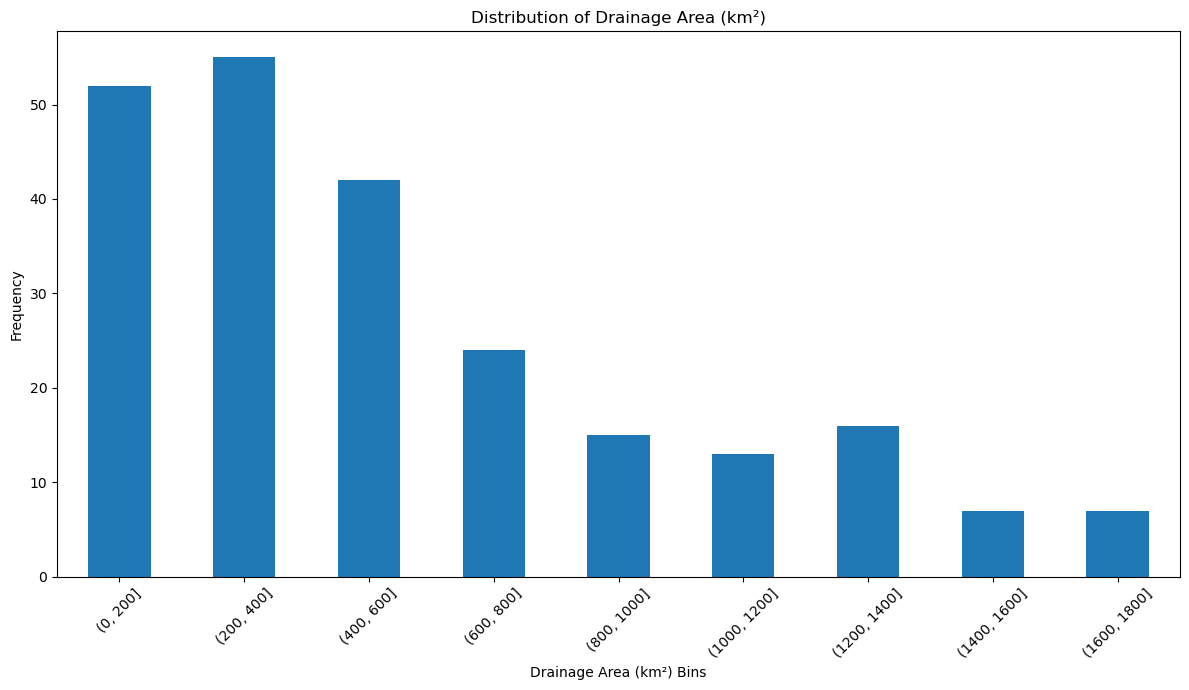

In [6]:
# Define bins for the drainage area
bins = pd.cut(atlantic_static_df['Drainage_Area_km2'], bins=range(0, int(atlantic_static_df['Drainage_Area_km2'].max()) + 1, 200))

# Aggregate the data into bins
bin_counts = atlantic_static_df.groupby(bins)['Drainage_Area_km2'].agg('count')

# Create a bar chart
plt.figure(figsize=(12, 7))
bin_counts.plot(kind='bar')

plt.title('Distribution of Drainage Area (km²)')
plt.xlabel('Drainage Area (km²) Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()  # Adjust layout so everything fits without overlapping

# Show the plot
plt.show()

It is observed that a significant proportion of the catchments in the dataset are relatively small in size. Given that smaller catchments can exhibit highly variable hydrological responses due to their limited area and more direct runoff processes, their behavior might be less consistent and harder to generalize. To ensure homogeneity in our neural hydraulic modeling and to focus on more integrated hydrological behaviors, this study will concentrate on catchments with areas greater than 200 km^2. This threshold is chosen to minimize the influence of highly localized and rapid hydrological responses, thereby allowing the model to capture more consistent and predictable patterns applicable to larger catchments.

In [7]:
# Filter out rows where Drainage_Area_km2 is less than 200
atlantic_static_df = atlantic_static_df[atlantic_static_df['Drainage_Area_km2'] >= 200]
atlantic_static_df['Official_ID'] = atlantic_static_df['Official_ID'].astype('str')
print(atlantic_static_df['Official_ID'].dtype)
# Display the first few rows of the updated DataFrame to confirm the change
print('Shape after filtering', atlantic_static_df.shape)


object
Shape after filtering (183, 21)


Do the same for pacific.

In [8]:
pacific_df['Official_ID'] = pacific_df['gauge_id'].str.replace('hysets_', '')
pacific_id_list = pacific_df['Official_ID'].tolist()
pacific_static_df = static_df[static_df['Official_ID'].isin(pacific_id_list)]
print("Entries for pacific:", pacific_static_df.shape)
pacific_static_df.head()
# Filter out rows where Drainage_Area_km2 is less than 200
pacific_static_df = pacific_static_df[pacific_static_df['Drainage_Area_km2'] >= 200]
pacific_static_df['Official_ID'] = pacific_static_df['Official_ID'].astype(str)
# Display the first few rows of the updated DataFrame to confirm the change
print('Shape after filtering', pacific_static_df.shape)


Entries for pacific: (243, 21)
Shape after filtering (182, 21)


### Catchment/Watersheds dynamic information

Moving on to the dynamic data, the data is saved in csv files, with file name being "hysets_&Official_ID". For example, the dynamic data for watersheds "02191300" would be "hysets_02191300".
Let's see what is contained inside.

In [9]:
atlantic_static_df.sort_values(by = 'Drainage_Area_km2', ascending=False).head()

,Official_ID,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction
4210,02191300,1968.3812,250.5,2.5054,1.3908,227.346,0,143.0697,0,0.5019,0.0918,0.0279,0.0052,0.1003,0.0151,0.2579,0.0,0,-14.099049,0.010182,0
4567,02326500,1934.7115,46.0,0.9579,1.8500,307.567,0,151.7306,0,0.3425,0.0275,0.3081,0.0026,0.0521,0.0933,0.1740,0.0,0,-12.373653,0.136487,0
4982,02455900,1831.1125,258.8,3.3551,1.5484,245.262,0,255.2018,0,0.4751,0.0387,0.0059,0.0084,0.0820,0.0434,0.3465,0.0,0,-13.866145,0.193477,0
4333,02231000,1812.9827,42.8,0.2316,1.7909,291.042,0,312.6598,0,0.3463,0.0481,0.3984,0.0033,0.0483,0.1296,0.0259,0.0,0,-13.012677,0.221518,0
4794,02387000,1779.3130,347.6,4.7767,1.4603,227.117,0,211.6817,0,0.6023,0.0245,0.0084,0.0034,0.1427,0.0390,0.1797,0.0,0,-14.815728,0.113230,0


We will have a look on the largest catchments, 02191300, to see what it has included.

In [10]:
large_df = pd.read_csv('atlantic_raw/hysets_02191300.csv')
large_df.head()

,date,snow_depth_water_equivalent_mean,surface_net_solar_radiation_mean,surface_net_thermal_radiation_mean,surface_pressure_mean,temperature_2m_mean,dewpoint_temperature_2m_mean,u_component_of_wind_10m_mean,v_component_of_wind_10m_mean,volumetric_soil_water_layer_1_mean,volumetric_soil_water_layer_2_mean,volumetric_soil_water_layer_3_mean,volumetric_soil_water_layer_4_mean,snow_depth_water_equivalent_min,surface_net_solar_radiation_min,surface_net_thermal_radiation_min,surface_pressure_min,temperature_2m_min,dewpoint_temperature_2m_min,u_component_of_wind_10m_min,v_component_of_wind_10m_min,volumetric_soil_water_layer_1_min,volumetric_soil_water_layer_2_min,volumetric_soil_water_layer_3_min,volumetric_soil_water_layer_4_min,snow_depth_water_equivalent_max,surface_net_solar_radiation_max,surface_net_thermal_radiation_max,surface_pressure_max,temperature_2m_max,dewpoint_temperature_2m_max,u_component_of_wind_10m_max,v_component_of_wind_10m_max,volumetric_soil_water_layer_1_max,volumetric_soil_water_layer_2_max,volumetric_soil_water_layer_3_max,volumetric_soil_water_layer_4_max,total_precipitation_sum,potential_evaporation_sum,streamflow
0,1981-01-01,0.0,122.91,-88.12,98.23,5.32,0.24,2.82,-0.37,0.46,0.46,0.46,0.46,0.0,0.0,-117.47,97.95,1.91,-3.13,1.73,-2.06,0.45,0.46,0.46,0.46,0.0,497.73,-55.96,98.68,10.89,1.63,4.00,0.53,0.46,0.46,0.46,0.46,0.0,15.84,NaN
1,1981-01-02,0.0,124.95,-98.21,98.93,3.19,-5.15,2.58,-0.40,0.45,0.46,0.46,0.46,0.0,0.0,-115.48,98.67,0.20,-6.16,2.12,-0.94,0.45,0.46,0.46,0.46,0.0,503.21,-81.35,99.16,7.95,-3.34,3.03,0.11,0.45,0.46,0.46,0.46,0.0,18.96,NaN
2,1981-01-03,0.0,114.25,-87.20,98.64,4.41,-3.67,2.63,0.48,0.44,0.45,0.46,0.46,0.0,0.0,-103.57,98.31,-0.78,-6.19,1.87,-0.23,0.44,0.45,0.46,0.46,0.0,445.40,-68.28,99.04,11.03,-0.11,3.70,1.27,0.45,0.46,0.46,0.46,0.0,17.84,NaN
3,1981-01-04,0.0,126.15,-100.45,98.77,2.94,-7.27,1.44,-1.37,0.44,0.45,0.46,0.46,0.0,0.0,-120.10,98.28,-2.49,-15.24,-1.33,-2.80,0.44,0.45,0.46,0.46,0.0,501.90,-74.95,99.58,6.90,0.48,2.23,0.37,0.44,0.45,0.46,0.46,0.0,20.19,NaN
4,1981-01-05,0.0,131.33,-103.57,99.64,-2.02,-12.78,-0.31,0.71,0.44,0.45,0.46,0.46,0.0,0.0,-130.01,99.49,-5.61,-14.66,-1.43,-0.58,0.44,0.45,0.46,0.46,0.0,522.73,-74.79,99.86,2.53,-10.78,0.69,1.63,0.44,0.45,0.46,0.46,0.0,14.11,NaN


It contains 40 columns. It is quite hard to read, we will first look at the column names.

In [11]:
large_df.columns

Index(['date', 'snow_depth_water_equivalent_mean',
       'surface_net_solar_radiation_mean',
       'surface_net_thermal_radiation_mean', 'surface_pressure_mean',
       'temperature_2m_mean', 'dewpoint_temperature_2m_mean',
       'u_component_of_wind_10m_mean', 'v_component_of_wind_10m_mean',
       'volumetric_soil_water_layer_1_mean',
       'volumetric_soil_water_layer_2_mean',
       'volumetric_soil_water_layer_3_mean',
       'volumetric_soil_water_layer_4_mean', 'snow_depth_water_equivalent_min',
       'surface_net_solar_radiation_min', 'surface_net_thermal_radiation_min',
       'surface_pressure_min', 'temperature_2m_min',
       'dewpoint_temperature_2m_min', 'u_component_of_wind_10m_min',
       'v_component_of_wind_10m_min', 'volumetric_soil_water_layer_1_min',
       'volumetric_soil_water_layer_2_min',
       'volumetric_soil_water_layer_3_min',
       'volumetric_soil_water_layer_4_min', 'snow_depth_water_equivalent_max',
       'surface_net_solar_radiation_max', 'su

With the list of Official_ID in hand (watersheds in Atlantic/Pacific with area => 200km^2). We can now move them into a new folder to faciliate the processing.

In [191]:
# Assuming atlantic_static_df is already defined and filtered to contain the entries you're interested in
official_ids = atlantic_static_df['Official_ID'].tolist()
# Define the directory paths
raw_data_directory = 'atlantic_raw'
processed_data_directory = 'atlantic_processed'
os.makedirs(processed_data_directory, exist_ok=True)  # Create the processed directory if it doesn't exist

# Copy the dynamic data CSV files
for official_id in official_ids:
    dynamic_file_name = f"hysets_{official_id}.csv"
    source_file_path = os.path.join(raw_data_directory, dynamic_file_name)
    destination_file_path = os.path.join(processed_data_directory, dynamic_file_name)
    
    # Check if the file exists and copy it
    if os.path.exists(source_file_path):
        shutil.copy(source_file_path, destination_file_path)

# Output the static DataFrame as a CSV file
static_file_path = os.path.join(processed_data_directory, 'atlantic_static_attributes.csv')
atlantic_static_df.to_csv(static_file_path, index=False)


In [192]:
# Assuming pacific_static_df is already defined and filtered to contain the entries you're interested in
official_ids = pacific_static_df['Official_ID'].tolist()

# Define the directory paths
raw_data_directory = 'pacific_raw'
processed_data_directory = 'pacific_processed'
os.makedirs(processed_data_directory, exist_ok=True)  # Create the processed directory if it doesn't exist

# Copy the dynamic data CSV files
for official_id in official_ids:
    dynamic_file_name = f"hysets_{official_id}.csv"
    source_file_path = os.path.join(raw_data_directory, dynamic_file_name)
    destination_file_path = os.path.join(processed_data_directory, dynamic_file_name)
    
    # Check if the file exists and copy it
    if os.path.exists(source_file_path):
        shutil.copy(source_file_path, destination_file_path)

# Output the static DataFrame as a CSV file
static_file_path = os.path.join(processed_data_directory, 'pacific_static_attributes.csv')
pacific_static_df.to_csv(static_file_path, index=False)

Or another way is to include all static information into the same dynamic data set.

The dynamic data set of hydrometric data, meteorological data, and the target of our exercise, streamflow. Since we noticed that the data contains 3 similar set of information, which are max, min and mean, we will only keep the mean for our model, since it should be the most representative.

At the same time, since some hydrometric/meteorological data may have a prolonged period of action on streamflow, we will also include the 5 days streamflow as separate columns.

In [14]:
official_ids = atlantic_static_df['Official_ID'].tolist()

# Define the directory paths
raw_data_directory = 'atlantic_raw'
output_directory = 'atlantic_static'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Loop through the Official_IDs in the static DataFrame
for official_id in official_ids:
    # Construct the file name for the dynamic data CSV
    dynamic_file_name = f"hysets_{official_id}.csv"
    dynamic_file_path = os.path.join(raw_data_directory, dynamic_file_name)
    
    # Check if the file exists
    if os.path.exists(dynamic_file_path):
        # Read the dynamic data
        dynamic_df = pd.read_csv(dynamic_file_path)
        
        # Remove columns that end with 'max' or 'min'
        cols_to_drop = [col for col in dynamic_df.columns if col.endswith('max') or col.endswith('min')]
        dynamic_df.drop(columns=cols_to_drop, inplace=True)

        # Extract the static information for the current Official_ID
        static_info = atlantic_static_df[atlantic_static_df['Official_ID'] == official_id].iloc[0]
        
        # Append the static information to all rows of the dynamic DataFrame
        for column in static_info.index:
            dynamic_df[column] = static_info[column]
        
        # Save the combined DataFrame to a new CSV file
        output_file_path = os.path.join(output_directory, dynamic_file_name)
        dynamic_df.to_csv(output_file_path, index=False)

In [15]:
official_ids = pacific_static_df['Official_ID'].tolist()

# Define the directory paths
raw_data_directory = 'pacific_raw'
output_directory = 'pacific_static'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Loop through the Official_IDs in the static DataFrame
for official_id in official_ids:
    # Construct the file name for the dynamic data CSV
    dynamic_file_name = f"hysets_{official_id}.csv"
    dynamic_file_path = os.path.join(raw_data_directory, dynamic_file_name)
    
    # Check if the file exists
    if os.path.exists(dynamic_file_path):
        # Read the dynamic data
        dynamic_df = pd.read_csv(dynamic_file_path)
        # Remove columns that end with 'max' or 'min'
        cols_to_drop = [col for col in dynamic_df.columns if col.endswith('max') or col.endswith('min')]
        dynamic_df.drop(columns=cols_to_drop, inplace=True)
       
        # Extract the static information for the current Official_ID
        static_info = pacific_static_df[pacific_static_df['Official_ID'] == official_id].iloc[0]
        
        # Append the static information to all rows of the dynamic DataFrame
        for column in static_info.index:
            dynamic_df[column] = static_info[column]
        
        # Save the combined DataFrame to a new CSV file
        output_file_path = os.path.join(output_directory, dynamic_file_name)
        dynamic_df.to_csv(output_file_path, index=False)

In [29]:
official_ids = atlantic_static_df['Official_ID'].tolist()
# Define the number of seconds in a day and a year using the more precise average year length
day_seconds = 60 * 60 * 24
year_seconds = 365.2425 * day_seconds

# Additional columns to drop
additional_columns_to_drop = [
    'Flag_Terrain_Extraction',
    'Flag_Shape_Extraction',
    'Flag_Land_Use_Extraction',
    'Flag_Subsoil_Extraction'
]

# Define the directory paths
raw_data_directory = 'atlantic_raw'
output_directory = 'atlantic_static'
os.makedirs(output_directory, exist_ok=True)  # Create the output directory if it doesn't exist

# Function to add year sin and year cos columns to a DataFrame
def add_timeframe_columns(df, date_column_name):
    # Convert the date to seconds
    df['Seconds'] = (pd.to_datetime(df[date_column_name]) - pd.Timestamp('1980-01-01')).dt.total_seconds()
    # Calculate the year sin and year cos
    df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year_seconds))
    df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year_seconds))
    # Create a new DataFrame with 'Year sin' and 'Year cos' as the first two columns
    timeframe_df = df[['Year sin', 'Year cos']]
    # Drop the 'Seconds' column and return the new DataFrame
    df.drop(columns=['Seconds', date_column_name], inplace=True)
    return pd.concat([timeframe_df, df], axis=1)

# Loop through the Official_IDs in the static DataFrame
for official_id in official_ids:
    # Construct the file name for the dynamic data CSV
    dynamic_file_name = f"hysets_{official_id}.csv"
    dynamic_file_path = os.path.join(raw_data_directory, dynamic_file_name)
    
    # Check if the file exists
    if os.path.exists(dynamic_file_path):
        # Read the dynamic data
        dynamic_df = pd.read_csv(dynamic_file_path)
        
        # Drop columns that end with 'max' or 'min'
        cols_to_drop = [col for col in dynamic_df.columns if col.endswith('max') or col.endswith('min')]
        dynamic_df.drop(columns=cols_to_drop, inplace=True)
        
        # Add 'Year sin' and 'Year cos' columns based on the date column
        dynamic_df = add_timeframe_columns(dynamic_df, date_column_name='date')
        
        # Move 'Streamflow' column to the end
        streamflow = dynamic_df['streamflow']
        dynamic_df.drop(columns=['streamflow'], inplace=True)
        dynamic_df['streamflow'] = streamflow
        
        # Extract the static information for the current Official_ID
        static_info = atlantic_static_df[atlantic_static_df['Official_ID'] == official_id].iloc[0]
        
        # Append the static information to all rows of the dynamic DataFrame
        for column in static_info.index:
            dynamic_df[column] = static_info[column]
        
        # Drop additional specified columns
        dynamic_df.drop(columns=additional_columns_to_drop, inplace=True)
        
        # Move 'Streamflow' column to the end
        streamflow = dynamic_df.pop('streamflow')
        dynamic_df['streamflow'] = streamflow
        
        # Save the combined DataFrame to a new CSV file
        output_file_path = os.path.join(output_directory, dynamic_file_name)
        dynamic_df.to_csv(output_file_path, index=False)


### Exploratory Data Analysis (Atlantic)

In [15]:
max_lag_days = 5  # Define the maximum number of days for lagging the streamflow data
output_directory = 'atlantic_static'  # Directory with processed dynamic data including static info

# Initialize an empty list to store each DataFrame
dataframes = []

# Iterate through each CSV file in the output directory
for file in os.listdir(output_directory):
    if file.endswith('.csv'):
        file_path = os.path.join(output_directory, file)
        df = pd.read_csv(file_path, dtype={'Official_ID': str})

        # Add lagged streamflow columns
        for lag in range(1, max_lag_days + 1):
            df[f'streamflow_lag_{lag}'] = df['streamflow'].shift(lag)

        # Optionally, drop rows with NaNs in the lagged columns if you want a clean dataset
        df.dropna(subset=[f'streamflow_lag_{lag}' for lag in range(1, max_lag_days + 1)], inplace=True)

        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list into one large DataFrame
atlantic_combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file if needed
output_combined_path = os.path.join(output_directory, 'combined_dynamic_static.csv')


In [16]:
print('Combined DataFrame shape:', atlantic_combined_df.shape)
atlantic_combined_df.tail()


Combined DataFrame shape: (1516751, 42)


,date,snow_depth_water_equivalent_mean,surface_net_solar_radiation_mean,surface_net_thermal_radiation_mean,surface_pressure_mean,temperature_2m_mean,dewpoint_temperature_2m_mean,u_component_of_wind_10m_mean,v_component_of_wind_10m_mean,volumetric_soil_water_layer_1_mean,volumetric_soil_water_layer_2_mean,volumetric_soil_water_layer_3_mean,volumetric_soil_water_layer_4_mean,total_precipitation_sum,potential_evaporation_sum,streamflow,Official_ID,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,streamflow_lag_1,streamflow_lag_2,streamflow_lag_3,streamflow_lag_4,streamflow_lag_5
1516746,2018-12-28,0.0,40.68,-11.29,101.30,20.48,19.35,0.54,2.90,0.28,0.26,0.27,0.15,21.72,2.23,1.40,02227500,1706.7937,55.1,0.5156,1.5627,241.568,0,135.0737,0,0.2049,0.0298,0.2911,0.0021,0.0729,0.1336,0.2656,0.0,0,-11.975638,0.256634,0,1.61,1.85,2.06,2.24,2.49
1516747,2018-12-29,0.0,25.14,-10.51,101.56,16.92,16.27,0.01,-0.53,0.31,0.31,0.28,0.15,3.95,0.75,1.63,02227500,1706.7937,55.1,0.5156,1.5627,241.568,0,135.0737,0,0.2049,0.0298,0.2911,0.0021,0.0729,0.1336,0.2656,0.0,0,-11.975638,0.256634,0,1.40,1.61,1.85,2.06,2.24
1516748,2018-12-30,0.0,37.41,-7.24,101.49,19.03,18.10,0.17,1.05,0.29,0.30,0.28,0.15,2.30,1.22,2.37,02227500,1706.7937,55.1,0.5156,1.5627,241.568,0,135.0737,0,0.2049,0.0298,0.2911,0.0021,0.0729,0.1336,0.2656,0.0,0,-11.975638,0.256634,0,1.63,1.40,1.61,1.85,2.06
1516749,2018-12-31,0.0,51.52,-18.63,101.43,20.36,18.87,-0.31,2.40,0.28,0.29,0.28,0.15,0.46,2.40,2.49,02227500,1706.7937,55.1,0.5156,1.5627,241.568,0,135.0737,0,0.2049,0.0298,0.2911,0.0021,0.0729,0.1336,0.2656,0.0,0,-11.975638,0.256634,0,2.37,1.63,1.40,1.61,1.85
1516750,2019-01-01,0.0,101.32,-46.58,101.39,20.88,17.81,1.69,2.24,0.26,0.28,0.28,0.15,0.01,5.04,NaN,02227500,1706.7937,55.1,0.5156,1.5627,241.568,0,135.0737,0,0.2049,0.0298,0.2911,0.0021,0.0729,0.1336,0.2656,0.0,0,-11.975638,0.256634,0,2.49,2.37,1.63,1.40,1.61


The DF contains about 1.5M entries, with 42 columns.

In [21]:
atlantic_combined_df['Flag_SubsoilExtraction'].sum()


0

We can see that the corresponding area, filename has been included in the DF. Now, let's quickly see if there is correlation between the inputs and streamflow.

In [27]:
# Calculate the full correlation matrix
full_correlation_matrix = atlantic_combined_df.corr()

# Filter the correlation matrix for streamflow and streamflow lags
streamflow_correlations = full_correlation_matrix.filter(regex='^streamflow').sort_values(by='streamflow', axis=1, ascending=False)

# Display the correlations
streamflow_correlations

/tmp/ipykernel_380/4597180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_correlation_matrix = atlantic_combined_df.corr()


,streamflow,streamflow_lag_1,streamflow_lag_2,streamflow_lag_3,streamflow_lag_4,streamflow_lag_5
snow_depth_water_equivalent_mean,0.029118,0.028189,0.026757,0.026902,0.026935,0.026003
surface_net_solar_radiation_mean,-0.132670,-0.058728,-0.045439,-0.046679,-0.046809,-0.047615
surface_net_thermal_radiation_mean,0.088559,-0.006851,-0.018879,-0.009991,-0.003616,0.002258
surface_pressure_mean,-0.091541,-0.064788,-0.054094,-0.053313,-0.054463,-0.056621
temperature_2m_mean,-0.186226,-0.201316,-0.195394,-0.185892,-0.178883,-0.172998
dewpoint_temperature_2m_mean,-0.114901,-0.154020,-0.151193,-0.141075,-0.134557,-0.128830
u_component_of_wind_10m_mean,0.076525,0.064079,0.036380,0.030403,0.027378,0.027807
v_component_of_wind_10m_mean,-0.020627,-0.044916,-0.016518,-0.003811,0.001397,0.004197
volumetric_soil_water_layer_1_mean,0.244324,0.225490,0.210114,0.198922,0.190250,0.183589
volumetric_soil_water_layer_2_mean,0.265977,0.251808,0.238413,0.228503,0.220847,0.214553


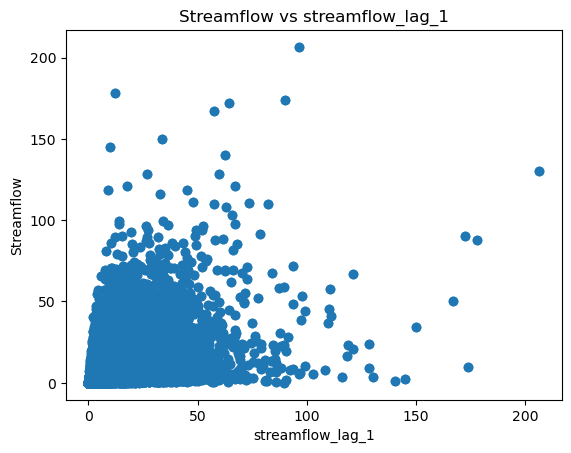

In [29]:
# Plotting scatter plots for streamflow and its lags against a particular variable
input_variable = 'streamflow_lag_1'  # example variable

# Plot for current streamflow
plt.scatter(atlantic_combined_df['streamflow'], atlantic_combined_df[input_variable])
plt.title(f'Streamflow vs {input_variable}')
plt.xlabel(input_variable)
plt.ylabel('Streamflow')
plt.show()


We could see a weak trend between streamflow at day T and T+1.

Next, we would also try to verify if some static watersheds attributes can affect the streamflow. 

    Official_ID  max_streamflow
0      02188680            4.59
1      02191300           25.85
2      02191743           21.51
3      02193500           40.76
4      02195320           42.78
..          ...             ...
361     3567340           44.17
362     3567500           55.18
363     3568933           85.59
364     3572900           58.62
365     3576500          149.96

[366 rows x 2 columns]


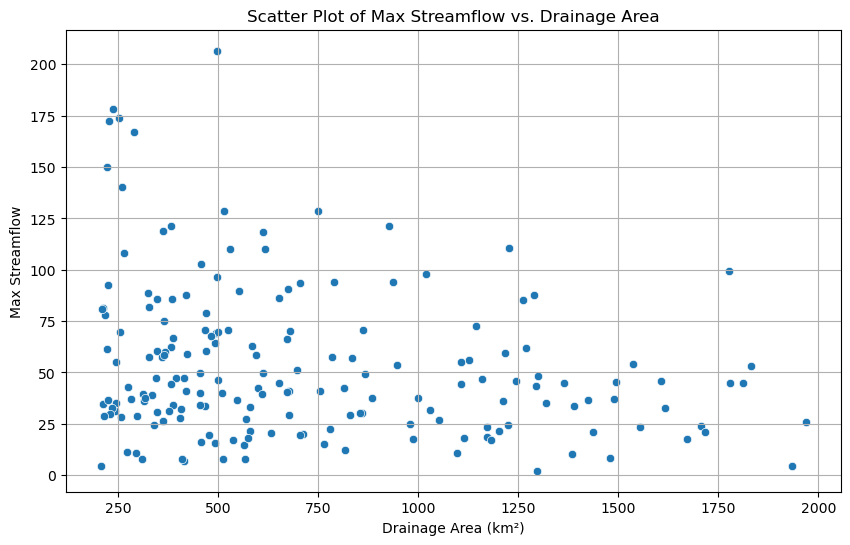

In [42]:
# Group by 'Official_ID' and calculate the max streamflow for each group
max_streamflow = atlantic_combined_df.groupby('Official_ID')['streamflow'].max().reset_index()
max_streamflow.rename(columns={'streamflow': 'max_streamflow'}, inplace=True)
print(max_streamflow)
# Merge the max streamflow back with the drainage area information
# Assuming that each 'Official_ID' only appears once and has one corresponding 'Drainage_Area_km2'
combined_with_area = pd.merge(max_streamflow, atlantic_combined_df[['Official_ID', 'Drainage_Area_km2']].drop_duplicates(), on='Official_ID')

# Plotting
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.scatterplot(data=combined_with_area, x='Drainage_Area_km2', y='max_streamflow')
plt.title('Scatter Plot of Max Streamflow vs. Drainage Area')
plt.xlabel('Drainage Area (km²)')
plt.ylabel('Max Streamflow')
plt.grid(True)  # Add grid for better readability
plt.show()

Surprisingly, no obvious relationship is observed. Let's try on Pacific set.

### Exploratory Data Analysis (Pacific)

In [32]:
max_lag_days = 5  # Define the maximum number of days for lagging the streamflow data
output_directory = 'pacific_static'  # Directory with processed dynamic data including static info

# Initialize an empty list to store each DataFrame
dataframes = []

# Iterate through each CSV file in the output directory
for file in os.listdir(output_directory):
    if file.endswith('.csv'):
        file_path = os.path.join(output_directory, file)
        df = pd.read_csv(file_path, dtype={'Official_ID': str})

        # Add lagged streamflow columns
        for lag in range(1, max_lag_days + 1):
            df[f'streamflow_lag_{lag}'] = df['streamflow'].shift(lag)

        # Optionally, drop rows with NaNs in the lagged columns if you want a clean dataset
        df.dropna(subset=[f'streamflow_lag_{lag}' for lag in range(1, max_lag_days + 1)], inplace=True)

        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list into one large DataFrame
pacific_combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file if needed
output_combined_path = os.path.join(output_directory, 'combined_dynamic_static.csv')
pacific_combined_df.to_csv(output_combined_path, index=False)


In [33]:
print('Combined DataFrame shape:', pacific_combined_df.shape)
pacific_combined_df.tail()


Combined DataFrame shape: (1655838, 42)


,date,snow_depth_water_equivalent_mean,surface_net_solar_radiation_mean,surface_net_thermal_radiation_mean,surface_pressure_mean,temperature_2m_mean,dewpoint_temperature_2m_mean,u_component_of_wind_10m_mean,v_component_of_wind_10m_mean,volumetric_soil_water_layer_1_mean,volumetric_soil_water_layer_2_mean,volumetric_soil_water_layer_3_mean,volumetric_soil_water_layer_4_mean,total_precipitation_sum,potential_evaporation_sum,streamflow,Official_ID,Drainage_Area_km2,Elevation_m,Slope_deg,Gravelius,Perimeter,Flag_Shape_Extraction,Aspect_deg,Flag_Terrain_Extraction,Land_Use_Forest_frac,Land_Use_Grass_frac,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,streamflow_lag_1,streamflow_lag_2,streamflow_lag_3,streamflow_lag_4,streamflow_lag_5
1655833,2018-12-21,243.56,30.56,-62.89,82.50,-9.36,-11.86,1.45,-0.44,0.33,0.33,0.33,0.36,0.85,1.40,0.02,12447383,966.0608,1690.2,24.65,1.5339,166.893,0,128.1841,0,0.5588,0.2475,0.0041,0.0014,0.0076,0.18,0.0003,0.0003,0,-14.329161,0.120128,0,0.02,0.03,0.03,0.03,0.03
1655834,2018-12-22,244.18,24.02,-22.88,82.81,-11.20,-13.18,-0.84,0.24,0.33,0.33,0.33,0.36,3.22,0.57,0.03,12447383,966.0608,1690.2,24.65,1.5339,166.893,0,128.1841,0,0.5588,0.2475,0.0041,0.0014,0.0076,0.18,0.0003,0.0003,0,-14.329161,0.120128,0,0.02,0.02,0.03,0.03,0.03
1655835,2018-12-23,250.34,24.49,-25.46,82.37,-7.26,-8.93,-0.23,0.31,0.33,0.33,0.33,0.36,5.57,0.59,0.04,12447383,966.0608,1690.2,24.65,1.5339,166.893,0,128.1841,0,0.5588,0.2475,0.0041,0.0014,0.0076,0.18,0.0003,0.0003,0,-14.329161,0.120128,0,0.03,0.02,0.02,0.03,0.03
1655836,2018-12-24,252.54,40.67,-60.43,82.59,-8.47,-10.47,-0.31,-0.33,0.33,0.33,0.33,0.36,0.07,0.95,0.03,12447383,966.0608,1690.2,24.65,1.5339,166.893,0,128.1841,0,0.5588,0.2475,0.0041,0.0014,0.0076,0.18,0.0003,0.0003,0,-14.329161,0.120128,0,0.04,0.03,0.02,0.02,0.03
1655837,2018-12-25,252.55,40.54,-60.35,82.85,-12.92,-16.03,-0.18,-0.54,0.32,0.33,0.33,0.36,0.00,0.85,NaN,12447383,966.0608,1690.2,24.65,1.5339,166.893,0,128.1841,0,0.5588,0.2475,0.0041,0.0014,0.0076,0.18,0.0003,0.0003,0,-14.329161,0.120128,0,0.03,0.04,0.03,0.02,0.02


The DF contains about 1.65M entries, with 42 columns.

We can see that the corresponding area, filename has been included in the DF. Now, let's quickly see if there is correlation between the inputs and streamflow.

In [34]:
# Calculate the full correlation matrix
full_correlation_matrix = pacific_combined_df.corr()

# Filter the correlation matrix for streamflow and streamflow lags
streamflow_correlations = full_correlation_matrix.filter(regex='^streamflow').sort_values(by='streamflow', axis=1, ascending=False)

# Display the correlations
streamflow_correlations

/tmp/ipykernel_380/3312018976.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_correlation_matrix = pacific_combined_df.corr()


,streamflow,streamflow_lag_1,streamflow_lag_2,streamflow_lag_3,streamflow_lag_4,streamflow_lag_5
snow_depth_water_equivalent_mean,0.097019,0.093734,0.090796,0.087958,0.085107,0.082236
surface_net_solar_radiation_mean,-0.187500,-0.161455,-0.150411,-0.143389,-0.137241,-0.131795
surface_net_thermal_radiation_mean,0.284023,0.222158,0.195893,0.182737,0.172295,0.163338
surface_pressure_mean,0.106456,0.113044,0.116447,0.118595,0.120038,0.120760
temperature_2m_mean,-0.058436,-0.075673,-0.082005,-0.082900,-0.082302,-0.082043
dewpoint_temperature_2m_mean,0.052368,0.016244,-0.001730,-0.008584,-0.012069,-0.014794
u_component_of_wind_10m_mean,-0.029907,-0.074080,-0.106891,-0.117389,-0.122932,-0.127006
v_component_of_wind_10m_mean,0.214928,0.142064,0.109773,0.090907,0.078492,0.068512
volumetric_soil_water_layer_1_mean,0.402332,0.380989,0.364335,0.352444,0.342651,0.333990
volumetric_soil_water_layer_2_mean,0.432937,0.415665,0.399655,0.387672,0.377745,0.368965


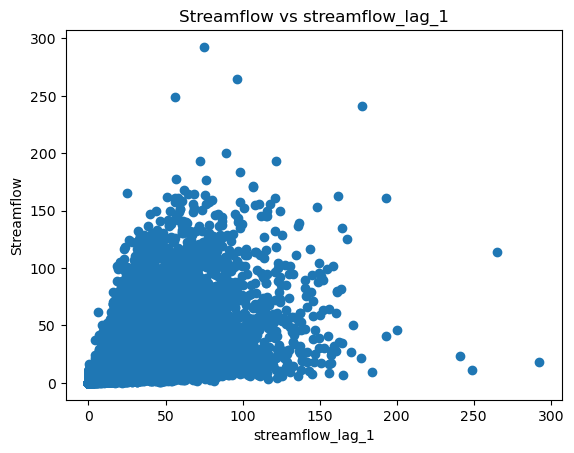

In [35]:
# Plotting scatter plots for streamflow and its lags against a particular variable
input_variable = 'streamflow_lag_1'  # example variable

# Plot for current streamflow
plt.scatter(pacific_combined_df['streamflow'], pacific_combined_df[input_variable])
plt.title(f'Streamflow vs {input_variable}')
plt.xlabel(input_variable)
plt.ylabel('Streamflow')
plt.show()


We could see a weak trend between streamflow at day T and T+1.

Next, we would also try to verify if some static watersheds attributes can affect the streamflow. 

    Official_ID  max_streamflow
0       08GA054           48.11
1       08GA071           79.92
2       08GA072           75.62
3       08GA075           75.85
4       08GD005           18.07
..          ...             ...
177    14305500          171.62
178    14306400           74.16
179    14306500           83.15
180    14307580           52.44
181    14307620           70.53

[182 rows x 2 columns]


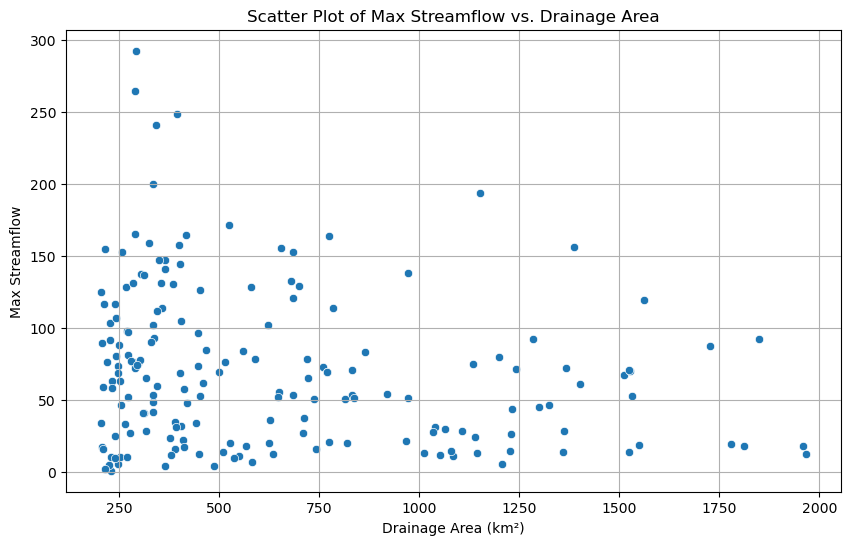

In [43]:
# Group by 'Official_ID' and calculate the max streamflow for each group
max_streamflow = pacific_combined_df.groupby('Official_ID')['streamflow'].max().reset_index()
max_streamflow.rename(columns={'streamflow': 'max_streamflow'}, inplace=True)
print(max_streamflow)
# Merge the max streamflow back with the drainage area information
# Assuming that each 'Official_ID' only appears once and has one corresponding 'Drainage_Area_km2'
combined_with_area = pd.merge(max_streamflow, pacific_combined_df[['Official_ID', 'Drainage_Area_km2']].drop_duplicates(), on='Official_ID')

# Plotting
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.scatterplot(data=combined_with_area, x='Drainage_Area_km2', y='max_streamflow')
plt.title('Scatter Plot of Max Streamflow vs. Drainage Area')
plt.xlabel('Drainage Area (km²)')
plt.ylabel('Max Streamflow')
plt.grid(True)  # Add grid for better readability
plt.show()

Similarly, no obvious relationship is observed.